# Lab 3: ML Life Cycle: Modeling

In [36]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Decision Trees (DTs) and KNNs have many similarities. They are models that are fairly simple and intuitive to understand, can be used to solve both classification and regression problems, and are non-parametric models, meaning that they don't assume a particular relationship between the features and the label prior to training. However, KNNs and DTs each have their own advantages and disadvantages. In addition, one model may be better suited than the other for a particular machine learning problem based on multiple factors, such as the size and quality of the data, the problem-type and the hyperparameter configuration. For example, KNNs require feature values to be scaled, whereas DTs do not. DTs are also able to handle noisy data better than KNNs. 

Often times, it is beneficial to train multiple models on your training data to find the one that performs the best on the test data. 

## Part 1. Build Your DataFrame and Define Your ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame


We will work with a new preprocessed, slimmed down version of the Airbnb NYC "listings" data set. This version is almost ready for modeling, with missing values and outliers taken care of. Also note that unstructured fields have been removed.

In [37]:
filename = os.path.join(os.getcwd(), "..", "data", "airbnbData_Prepared.csv")

In [38]:
df = pd.read_csv(filename)

####  Inspect the Data

In [39]:
print(df.shape)
print(df.columns)

(28022, 43)
Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count

In [40]:
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,0.800000,0.170000,False,8,8,True,True,Manhattan,Entire home/apt,1,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,0.090000,0.690000,False,1,1,True,True,Brooklyn,Entire home/apt,3,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,1.000000,0.250000,False,1,1,True,True,Brooklyn,Entire home/apt,4,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,1.000000,1.000000,False,1,1,True,False,Manhattan,Private room,2,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,0.890731,0.768297,False,1,1,True,True,Manhattan,Private room,1,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


#### Define the Label

Our goal is to train a machine learning model that predicts whether an Airbnb host is a 'super host'. This is an example of supervised learning and is a binary classification problem. In our dataset, our label will be the `host_is_superhost` column and the label will either contain the value `True` or `False`. Let's inspect the values in the `host_is_superhost` column.

In [41]:
df['host_is_superhost']

0        False
1        False
2        False
3        False
4        False
         ...  
28017    False
28018    False
28019     True
28020     True
28021    False
Name: host_is_superhost, Length: 28022, dtype: bool

#### Identify Features

Our features will be all of the remaining columns in the dataset. 

In [42]:
features = [col for col in df.columns if col != 'host_is_superhost']
features

['host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_ro

## Part 2. Prepare Data

#### Identify the Features that Should be One-Hot Encoded

In [43]:
# YOUR CODE HERE
to_encode = [col for col in df.columns if df[col].dtype == object]
to_encode

['neighbourhood_group_cleansed', 'room_type']

In [44]:
# YOUR CODE HERE
df[to_encode].nunique()

neighbourhood_group_cleansed    5
room_type                       4
dtype: int64

#### One-Hot Encode the Features

In [45]:
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# Create the encoder:
# Create the  Scikit-learn OneHotEncoder object below and assign to variable 'enc'.
# When calling OneHotEncoder(), specify that the 'sparse_output' parameter is False
enc = OneHotEncoder(sparse_output=False)

# Apply the encoder:
# Use the method 'enc.fit_transform() to fit the encoder to the data (the two columns) and transform the data into 
# one-hot encoded values
# Convert the results to a DataFrame and save it to variable 'df_enc'
enc_fit = enc.fit_transform(df[to_encode])
df_enc = pd.DataFrame(enc_fit)

Let's inspect our new DataFrame `df_enc` that contains the one-hot encoded columns.

In [46]:
df_enc.head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
# Use the method enc.get_feature_names() to resintate the original column names. 
# Call the function with the original two column names as arguments.
# Save the results to 'df_enc.columns'
df_enc.columns = enc.get_feature_names_out(to_encode)

Let's inspect our new DataFrame `df_enc` once again.

In [48]:
df_enc.head(10)

,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [49]:
df = df.drop(columns=to_encode)

In [50]:
df = df.join(df_enc)

Glance at the resulting column names:

In [51]:
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_r

## Part 3. Create Labeled Examples from the Data Set 

In [52]:
X = df.drop(columns='host_is_superhost')
y = df['host_is_superhost']

In [53]:
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 28022

Number of Features:49
['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'n_host_

## Part 4. Create Training and Test Data Sets

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [55]:
print(X_train.shape)
print(X_test.shape)

(18774, 49)
(9248, 49)


## Part 5. Train Decision Tree Classifers and Evaluate their Performances

In [56]:
def train_test_DT(X_train, X_test, y_train, y_test, depth, leaf=2, crit='entropy'):
    
    model = DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_leaf=leaf)
    model.fit(X_train, y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return acc_score

#### Train Two Decision Trees and Evaluate Their Performances

In [57]:
score1 = train_test_DT(X_train, X_test, y_train, y_test, depth = 8)
score2 = train_test_DT(X_train, X_test, y_train, y_test, depth = 32)

print(8, score1)
print(32, score2)

8 0.833044982698962
32 0.80655276816609


#### Visualize Accuracy

In [58]:
# YOUR CODE HERE
def visualize_accuracy(hyperparams, scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    p = sns.lineplot(x=hyperparams, y=scores, marker='o', label = 'Full training set')

    plt.title('Test set accuracy')
    ax.set_xlabel('max_depth')
    ax.set_ylabel('Accuracy')
    plt.show()

<b>Task</b>: Test your visualization function below by calling the function to plot the max depth values and accuracy scores of the two decision trees that you just trained.

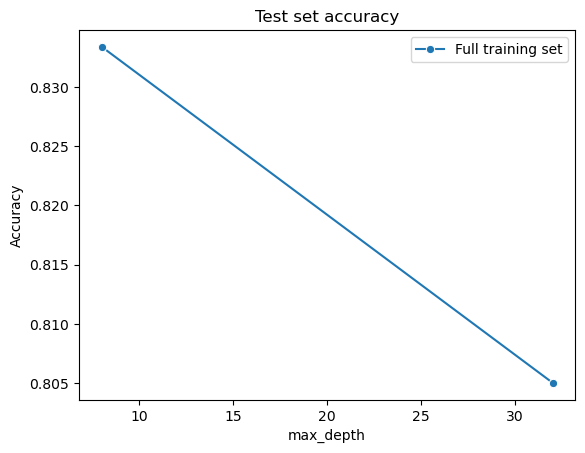

In [59]:
visualize_accuracy([8,32], [0.8333693771626297, 0.8050389273356401])

#### Train Multiple Decision Trees Using Different Hyperparameter Values and Evaluate Their Performances

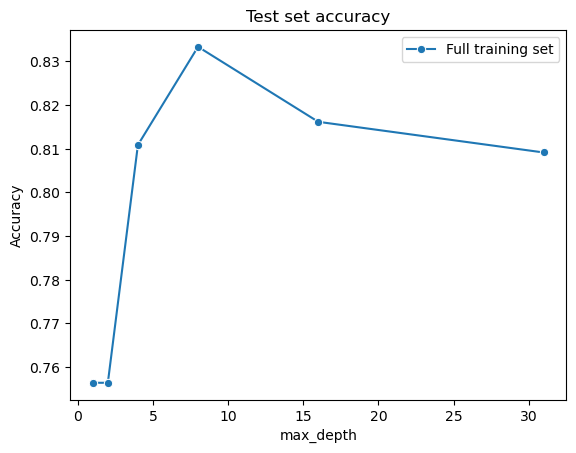

In [60]:
depths = []
scores = []

for depth in [1,2,4,8,16,31]:
    score = train_test_DT(X_train, X_test, y_train, y_test, depth)
    depths.append(depth)
    scores.append(score)

visualize_accuracy(depths, scores)

## Part 6. Train KNN Classifiers and Evaluate their Performances


In [61]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    model = KNeighborsClassifier(k)
    model.fit(X_train, y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return acc_score

#### Train Three KNN Classifiers and Evaluate Their Performances


In [62]:
score1 = train_test_knn(X_train, X_test, y_train, y_test, 3)
score2 = train_test_knn(X_train, X_test, y_train, y_test, 30)
score3 = train_test_knn(X_train, X_test, y_train, y_test, 300)

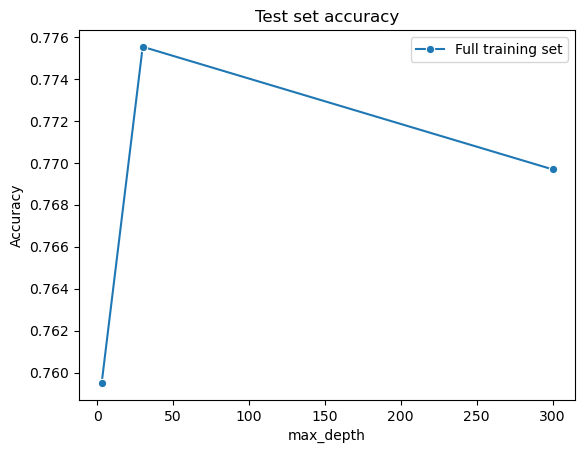

In [63]:
visualize_accuracy([3,30,300], [score1, score2, score3])

#### Train Multiple KNN Classifiers Using Different Hyperparameter Values and Evaluate Their Performances

In [64]:
k_range = np.arange(1, 40, step = 3) 
k_range

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37])

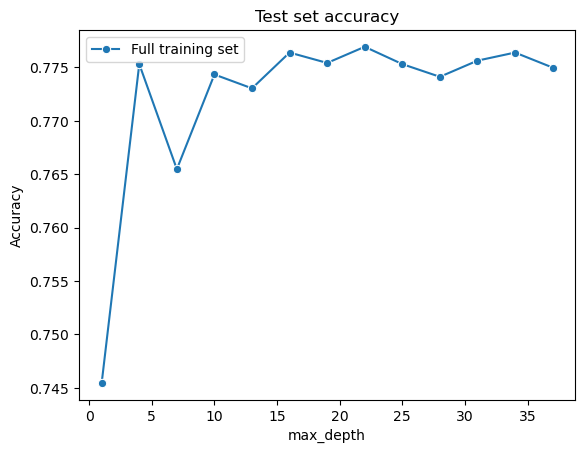

In [65]:
k_vals = []
scores = []
for k in k_range:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    k_vals.append(k)
    scores.append(score)
    
visualize_accuracy(k_vals, scores)

In [66]:
print(scores)

[0.7454584775086506, 0.77530276816609, 0.7654628027681661, 0.7743295847750865, 0.7730320069204152, 0.7763840830449827, 0.7754108996539792, 0.776924740484429, 0.77530276816609, 0.7741133217993079, 0.7756271626297578, 0.7763840830449827, 0.7749783737024222]
